In [1]:
import glob
import pandas as pd 

# Specify what folders do we need
INPUT_FOLDER      = '../data_preprocessed4/'

list_df_metadata = []

# Find all files that ends with .csv, read and append to the list_df_metadata
for filename in glob.glob(INPUT_FOLDER + '*.csv'):
    df_data = pd.read_csv(filename)
    list_df_metadata.append(df_data)
    
df_metadata = pd.concat(list_df_metadata)
df_metadata = df_metadata.drop(['Unnamed: 0'], axis=1)
df_metadata = df_metadata.reset_index(drop=True)
df_metadata.head()

/home/zh.shakenov/miniconda3/envs/disser/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,lat,long,altitude,datetime,timedelta,distance,velocity,acceleration,trajectory_id,subfolder,...,a_ave,a_med,a_max,a_min,a_std,a_rol,a_rsd,a_qu1,a_qu2,a_qu3
0,40.061035,116.407049,64.0,2011-05-29 22:30:19,0 days 00:00:01.000000000,13.357307,13.357307,-0.810261,20110529222904,168,...,-0.029584,0.0,8.873882,-14.649245,0.731106,-0.193232,3.278783,-0.531929,0.024086,0.678226
1,40.060915,116.407060,65.0,2011-05-29 22:30:20,0 days 00:00:01.000000000,12.547046,12.547046,0.810261,20110529222904,168,...,-0.029584,0.0,8.873882,-14.649245,0.731106,-0.107458,3.269948,-0.333394,0.050601,0.784147
2,40.060802,116.407060,63.0,2011-05-29 22:30:21,0 days 00:00:01.000000000,13.357307,13.357307,-0.634696,20110529222904,168,...,-0.029584,0.0,8.873882,-14.649245,0.731106,-0.118051,3.271165,-0.531929,0.050601,0.784147
3,40.060682,116.407071,63.0,2011-05-29 22:30:22,0 days 00:00:01.000000000,12.722611,12.722611,-1.113277,20110529222904,168,...,-0.029584,0.0,8.873882,-14.649245,0.731106,-0.118465,3.271294,-0.531929,0.050601,0.784147
4,40.060568,116.407086,62.0,2011-05-29 22:30:23,0 days 00:00:01.000000000,11.609334,11.609334,-1.358473,20110529222904,168,...,-0.029584,0.0,8.873882,-14.649245,0.731106,-0.152541,3.278956,-0.618968,0.050601,0.784147


In [2]:
df_metadata['labels'].unique()

array([nan, 'walk', 'bus', 'taxi', 'bike', 'car', 'train', 'subway',
       'motorcycle', 'boat', 'airplane', 'run'], dtype=object)

In [3]:
print('Before: ', df_metadata.shape)
df = df_metadata.dropna()
print('Now: ', df.shape)

Before:  (23380929, 31)
Now:  (4583070, 31)


In [4]:
df['labels'].unique()

array(['walk', 'bus', 'taxi', 'bike', 'car', 'train', 'subway',
       'motorcycle', 'boat', 'airplane', 'run'], dtype=object)

In [5]:
data = {}

for un in df['labels'].unique():
    data[un] = (df[df['labels'] == un].shape[0] / 60) / 60

In [6]:
data

{'walk': 341.22194444444443,
 'bus': 321.78333333333336,
 'taxi': 55.12388888888889,
 'bike': 195.99972222222223,
 'car': 134.55083333333334,
 'train': 155.2525,
 'subway': 65.03305555555555,
 'motorcycle': 0.0938888888888889,
 'boat': 0.9727777777777777,
 'airplane': 2.4972222222222222,
 'run': 0.5458333333333333}

|Mode| Transportation Mode | Collection Time (h)   |
|----|:---:|:---:|
|x|   walk  | 341|
|x|   taxi  | 55|
|x|   bike  | 196|
|x|   car  | 135|
|x|   train  | 155|
|x|   subway  | 65|
|x|   motorcycle  | 0.1|
|x|   boat  | 1|
|x|   airplane | 2.5 |
|x|   run      | 0.5 |

| Transportation Mode | Collection Time (h)   |
|:---:|:---:|
|   walk  | 341|
|   taxi  | 55|
|   bike  | 196|
|   car  | 135|
|   train  | 155|
|   subway  | 65|
|   motorcycle  | 0.1|
|   boat  | 1|
|   airplane | 2.5 |
|   run      | 0.5 |

In [7]:
labels = list(df['labels'].unique())

In [8]:
labels.remove('motorcycle')
labels.remove('run')
labels.remove('boat')
labels.remove('airplane')
labels.remove('subway')

In [9]:
mindataset = df[df['labels'].isin(labels)]
map_min = {'airplane': 'airplane', 'bike': 'bike', 'subway': 'subway', 'train': 'train', 'run': 'run',
           'walk': 'walk', 'boat': 'boat', 'bus': 'vehicle', 'car': 'vehicle', 'taxi': 'vehicle'}
mindataset['labels'] = mindataset['labels'].apply(lambda x: map_min[x])

/home/zh.shakenov/miniconda3/envs/disser/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
mindataset['labels'].unique()

array(['walk', 'vehicle', 'bike', 'train'], dtype=object)

In [11]:
data = {}

for un in mindataset['labels'].unique():
    data[un] = (mindataset[mindataset['labels'] == un].shape[0] / 60) / 60

In [12]:
data

{'walk': 341.22194444444443,
 'vehicle': 511.4580555555556,
 'bike': 195.99972222222223,
 'train': 155.2525}

| Transportation Mode | Collection Time (h)   |
|:---:|:---:|
|   walk  | 341|
|   bike  | 196|
|   train | 155|
|vehicle  | 511|  

In [13]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="ticks")

sns.boxplot(x="labels", y="velocity", data=mindataset,
           whis=np.inf, palette="vlag")
sns.despine(trim=True, left=True)


In [14]:
# Setting filters so outliers is would't be in model
velocity_lower_filter = df_metadata['velocity'].quantile(q=0.0)
velocity_upper_filter = df_metadata['velocity'].quantile(q=0.95)

acceleration_lower_filter = df_metadata['acceleration'].quantile(q=0.02)
acceleration_upper_filter = df_metadata['acceleration'].quantile(q=0.98)

print('Filters value : ', velocity_lower_filter, velocity_upper_filter,
         acceleration_lower_filter, acceleration_upper_filter)

mindataset_filtered = mindataset[(mindataset['velocity'] > velocity_lower_filter) 
                    & (mindataset['velocity'] < velocity_upper_filter)
                    & (mindataset['acceleration'] < acceleration_upper_filter)
                    & (mindataset['acceleration'] > acceleration_lower_filter)]

Filters value :  0.0 28.89833548769029 -1.589256700791666 1.3435363875946706


In [16]:
# import numpy as np 
# import seaborn as sns
# import matplotlib.pyplot as plt 
# sns.set(style="ticks")

# sns.boxplot(x="labels", y="velocity", data=mindataset_filtelabred,
#            whis=np.inf, palette="vlag")
# sns.despine(trim=True, left=True)


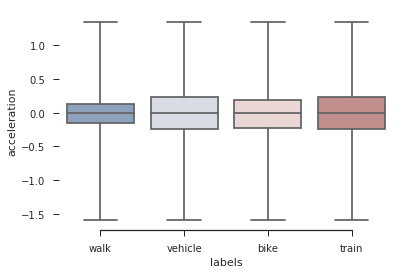

In [17]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(style="ticks")

sns.boxplot(x="labels", y="acceleration", data=mindataset_filtered,
           whis=np.inf, palette="vlag")
sns.despine(trim=True, left=True)


In [18]:
# Personal filters on mode 

def get_filters(data, mode):
    velocity_lower_filter = data[data['labels'] == mode]['velocity'].quantile(q=0.0)
    velocity_upper_filter = data[data['labels'] == mode]['velocity'].quantile(q=0.95)

    acceleration_lower_filter = data[data['labels'] == mode]['acceleration'].quantile(q=0.02)
    acceleration_upper_filter = data[data['labels'] == mode]['acceleration'].quantile(q=0.98)

    print('Filters value : ', velocity_lower_filter, velocity_upper_filter,
             acceleration_lower_filter, acceleration_upper_filter)
    
    filtered_data = data[data['labels'] == mode]

    filtered_data = filtered_data[(filtered_data['velocity'] > velocity_lower_filter) 
                        & (filtered_data['velocity'] < velocity_upper_filter)
                        & (filtered_data['acceleration'] < acceleration_upper_filter)
                        & (filtered_data['acceleration'] > acceleration_lower_filter)]
    return filtered_data
    


labels = list(mindataset['labels'].unique())
print(labels)
res = get_filters(mindataset, 'train')
res.shape
print(type(res))

['walk', 'vehicle', 'bike', 'train']
Filters value :  0.0 45.8801135008154 -1.2993180748842017 1.284955009351164
<class 'pandas.core.frame.DataFrame'>


In [19]:
datasets = []
for un in list(mindataset['labels'].unique()):
    datasets.append(
        get_filters(mindataset, un)
    )
df_g = pd.concat(datasets)


Filters value :  0.0 3.890378170503307 -1.3104390868026041 1.2396177566548499
Filters value :  0.0 21.025648907573835 -1.4885676817248457 1.377859893313329
Filters value :  0.0 6.323911236838857 -1.9525327316727894 1.9969812461362897
Filters value :  0.0 45.8801135008154 -1.2993180748842017 1.284955009351164


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_plot(x, y, data):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)

    sns.boxplot(x=x, y=y, data=data,
               whis=np.inf, palette="vlag", ax=ax)
    sns.despine(trim=True, left=True)
    plt.show()

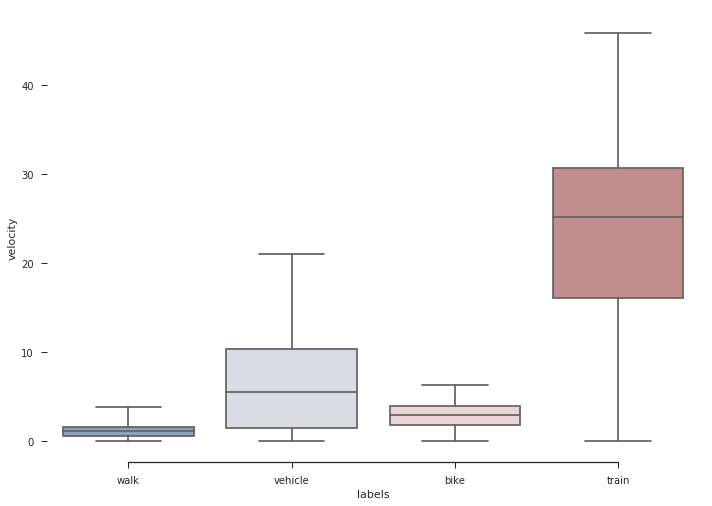

In [21]:
show_plot(x="labels", y="velocity", data=df_g)

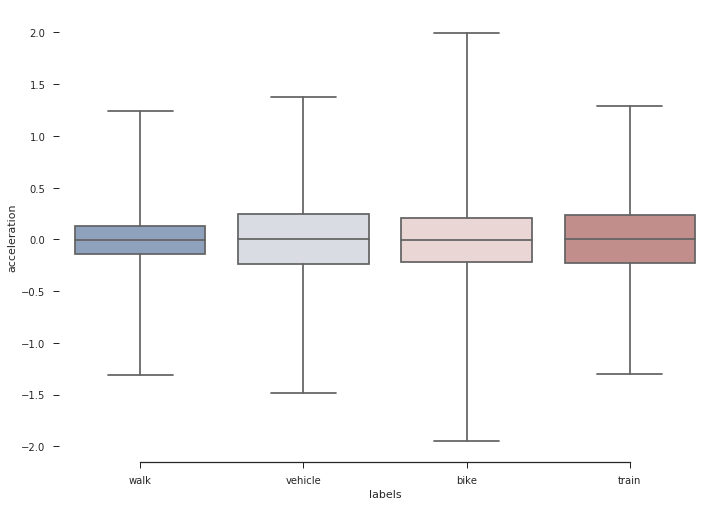

In [22]:
show_plot(x="labels", y="acceleration", data=df_g)

In [23]:
df_g.columns.unique()

Index(['lat', 'long', 'altitude', 'datetime', 'timedelta', 'distance',
       'velocity', 'acceleration', 'trajectory_id', 'subfolder', 'labels',
       'v_ave', 'v_med', 'v_max', 'v_min', 'v_std', 'v_rol', 'v_rsd', 'v_qu1',
       'v_qu2', 'v_qu3', 'a_ave', 'a_med', 'a_max', 'a_min', 'a_std', 'a_rol',
       'a_rsd', 'a_qu1', 'a_qu2', 'a_qu3'],
      dtype='object')

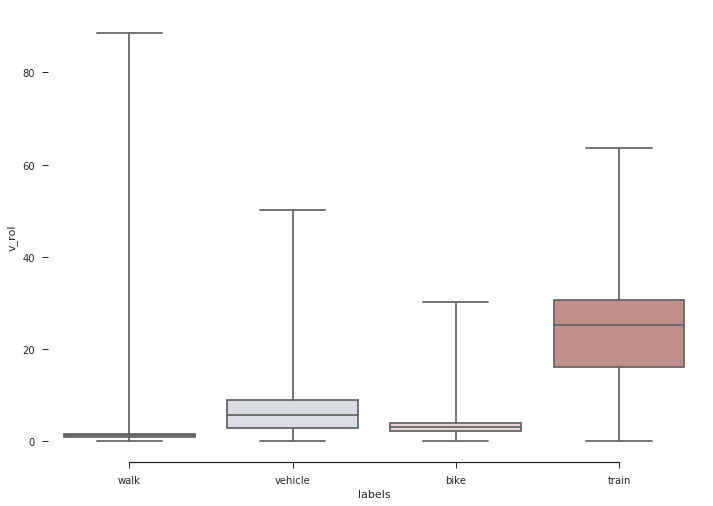

In [24]:
show_plot(x="labels", y="v_rol", data=df_g)

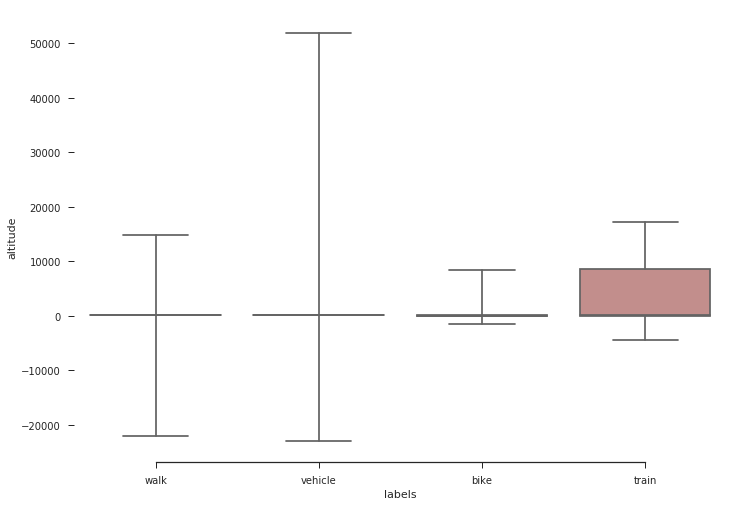

In [25]:
show_plot(x="labels", y="altitude", data=df_g)

In [26]:
columns = list(df_g.columns.unique())
print(columns)

['lat', 'long', 'altitude', 'datetime', 'timedelta', 'distance', 'velocity', 'acceleration', 'trajectory_id', 'subfolder', 'labels', 'v_ave', 'v_med', 'v_max', 'v_min', 'v_std', 'v_rol', 'v_rsd', 'v_qu1', 'v_qu2', 'v_qu3', 'a_ave', 'a_med', 'a_max', 'a_min', 'a_std', 'a_rol', 'a_rsd', 'a_qu1', 'a_qu2', 'a_qu3']


In [27]:
df_g.head()['distance']

250017     9.197219
250018    10.076737
250019     9.085656
250020     7.928605
250021     8.277571
Name: distance, dtype: float64

In [28]:
X_columns = ['distance', 'velocity', 'acceleration','v_ave', 'v_med', 'v_max', 'v_min', 'v_std', 
             'v_rol', 'v_rsd', 'v_qu1', 'v_qu2', 'v_qu3', 'a_ave', 'a_med', 'a_max', 'a_min', 'a_std', 
             'a_rol', 'a_rsd', 'a_qu1', 'a_qu2', 'a_qu3']

Y_columns = ['labels']

In [29]:
X = df_g[X_columns]
y = df_g[Y_columns]

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=43
    )

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
y_pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       bike       0.95      0.95      0.95    582587
      train       0.97      0.97      0.97    456741
    vehicle       0.94      0.94      0.94   1475871
       walk       0.92      0.92      0.92    989421

avg / total       0.94      0.94      0.94   3504620



In [33]:
import graphviz

In [34]:
class_names = list(y['labels'].unique())
print(class_names)
feature_names = list(X.columns)
print(feature_names)

['walk', 'vehicle', 'bike', 'train']
['distance', 'velocity', 'acceleration', 'v_ave', 'v_med', 'v_max', 'v_min', 'v_std', 'v_rol', 'v_rsd', 'v_qu1', 'v_qu2', 'v_qu3', 'a_ave', 'a_med', 'a_max', 'a_min', 'a_std', 'a_rol', 'a_rsd', 'a_qu1', 'a_qu2', 'a_qu3']


In [35]:
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

In [36]:
graph = graphviz.Source(dot_data) 

In [37]:
dot_data = tree.export_graphviz(clf, out_file='filename.png', 
                         feature_names=feature_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

In [38]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
from sklearn.neighbors import KNeighborsClassifier

kmodel = KNeighborsClassifier(n_jobs=13)
kmodel.fit(X_train, y_train)
y_pred = kmodel.predict(X_test)
print(classification_report(y_test, y_pred))

/home/zh.shakenov/miniconda3/envs/disser/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


             precision    recall  f1-score   support

       bike       0.95      0.95      0.95    582587
      train       0.96      0.97      0.97    456741
    vehicle       0.95      0.93      0.94   1475871
       walk       0.91      0.93      0.92    989421

avg / total       0.94      0.94      0.94   3504620



### ---
### Explore data
### ---

In [44]:
df_g.head()

,lat,long,altitude,datetime,timedelta,distance,velocity,acceleration,trajectory_id,subfolder,...,a_ave,a_med,a_max,a_min,a_std,a_rol,a_rsd,a_qu1,a_qu2,a_qu3
250017,39.975258,116.302883,0.0,2011-12-07 03:44:20,0 days 00:00:05.000000000,9.197219,1.839444,0.035181,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.124969,2.089089,-0.106391,0.010902,0.119766
250018,39.975337,116.302848,0.0,2011-12-07 03:44:25,0 days 00:00:05.000000000,10.076737,2.015347,-0.039643,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.133245,2.087888,-0.095810,0.010902,0.119766
250019,39.975423,116.302813,0.0,2011-12-07 03:44:30,0 days 00:00:05.000000000,9.085656,1.817131,-0.046282,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.135362,2.087665,-0.093068,0.010902,0.119766
250020,39.975505,116.302820,0.0,2011-12-07 03:44:35,0 days 00:00:05.000000000,7.928605,1.585721,0.013959,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.146394,2.086066,-0.077928,0.019500,0.119766
250021,39.975575,116.302838,0.0,2011-12-07 03:44:40,0 days 00:00:05.000000000,8.277571,1.655514,-0.038735,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.148310,2.085862,-0.044622,0.019500,0.119766


In [50]:
driverId = 21
trajIds = list(df_g[df_g['subfolder'] == driverId].trajectory_id.unique())

for traj in trajIds:
    print(df_g[(df_g['subfolder'] == driverId) & (df_g['trajectory_id'] == traj)].shape)

(200, 31)
(206, 31)
(444, 31)
(631, 31)
(14, 31)
(45, 31)
(175, 31)


In [77]:
trajIds[3]

20070501010311

In [78]:
trajId = 20070501010311

In [79]:
df_g[(df_g['subfolder'] == driverId) & (df_g['trajectory_id'] == trajId)].head()

,lat,long,altitude,datetime,timedelta,distance,velocity,acceleration,trajectory_id,subfolder,...,a_ave,a_med,a_max,a_min,a_std,a_rol,a_rsd,a_qu1,a_qu2,a_qu3
13988637,28.098950,116.957000,295.275591,2007-05-01 06:09:24,0 days 00:00:24.000000000,27.898243,1.162427,-0.006081,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.101507,3.163976,-0.147164,-0.004357,0.102705
13988638,28.098700,116.957033,305.118110,2007-05-01 06:09:48,0 days 00:00:17.000000000,17.280346,1.016491,0.013608,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.105971,3.163747,-0.147164,-0.001768,0.102705
13988639,28.098583,116.957150,308.398950,2007-05-01 06:10:05,0 days 00:00:30.000000000,37.434883,1.247829,0.007552,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.107348,3.163693,-0.147164,0.000041,0.102705
13988640,28.098450,116.957500,301.837270,2007-05-01 06:10:35,0 days 00:00:16.000000000,23.590210,1.474388,-0.006928,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.098502,3.163627,-0.147164,-0.001768,0.061292
13988641,28.098400,116.957733,314.960630,2007-05-01 06:10:51,0 days 00:00:22.000000000,29.997916,1.363542,-0.011528,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.102263,3.163420,-0.147164,-0.001768,0.061292


In [80]:
from gmplot import gmplot

df_g.columns

Index(['lat', 'long', 'altitude', 'datetime', 'timedelta', 'distance',
       'velocity', 'acceleration', 'trajectory_id', 'subfolder', 'labels',
       'v_ave', 'v_med', 'v_max', 'v_min', 'v_std', 'v_rol', 'v_rsd', 'v_qu1',
       'v_qu2', 'v_qu3', 'a_ave', 'a_med', 'a_max', 'a_min', 'a_std', 'a_rol',
       'a_rsd', 'a_qu1', 'a_qu2', 'a_qu3'],
      dtype='object')

In [81]:
userDriving = df_g[(df_g['subfolder'] == driverId) & (df_g['trajectory_id'] == trajId)]
userDriving.shape

(631, 31)

In [82]:
plotd = {}

for i, val in userDriving.iterrows():
    if plotd.get(val['labels']):
        plotd[val['labels']].append()
    outArray.append((val.lat, val.long))
    print(val.lat, val.long, val['labels'])

28.09895 116.957 walk
28.0987 116.957033333333 walk
28.098583333333305 116.95715 walk
28.09845 116.9575 walk
28.0984 116.957733333333 walk
28.09835 116.95803333333299 walk
28.09845 116.958316666667 walk
28.098483333333306 116.9585 walk
28.098583333333305 116.958616666667 walk
28.0984666666667 116.958616666667 walk
28.0983333333333 116.958766666667 walk
28.0982333333333 116.95888333333299 walk
28.09815 116.95905 walk
28.0981 116.9592 walk
28.09785 116.959216666667 walk
28.0977166666667 116.95925 walk
28.0975166666667 116.9593 walk
28.097333333333307 116.9593 walk
28.0970666666667 116.9593 walk
28.0969333333333 116.95925 walk
28.09675 116.959216666667 walk
28.0965 116.95925 walk
28.096366666666693 116.959233333333 walk
28.09655 116.959133333333 walk
28.0967333333333 116.959133333333 walk
28.0968666666667 116.959183333333 walk
28.0970666666667 116.959233333333 walk
28.0972833333333 116.959266666667 walk
28.097433333333306 116.959266666667 walk
28.0974 116.959783333333 walk
28.097416666666

28.2109666666667 116.81165 walk
28.2111333333333 116.81171666666701 walk
28.21145 116.81175 walk
28.2116833333333 116.811766666667 walk
28.2119 116.811816666667 walk
28.212133333333306 116.811883333333 walk
28.2121166666667 116.812166666667 walk
29.3681333333333 115.750366666667 vehicle
29.36135 115.750233333333 vehicle
29.359633333333306 115.75041666666701 vehicle
29.2514833333333 115.7586 vehicle
29.250783333333306 115.75861666666701 vehicle
29.250233333333306 115.7587 vehicle
29.2501166666667 115.758766666667 vehicle
28.5527 115.754533333333 vehicle
28.278766666666694 116.7813 vehicle
28.27825 116.7826 vehicle
28.2773 116.78355 vehicle
28.2753 116.784983333333 vehicle
28.275116666666694 116.785466666667 vehicle
28.2748 116.785333333333 vehicle
28.2702166666667 116.78938333333299 vehicle
28.2267833333333 116.792633333333 vehicle
28.2228166666667 116.791133333333 vehicle
28.220866666666694 116.81123333333299 vehicle
28.220283333333306 116.811733333333 vehicle
28.2181 116.8126 vehicle


In [83]:
outArray

[(28.09895, 116.957),
 (28.0987, 116.957033333333),
 (28.098583333333305, 116.95715),
 (28.09845, 116.9575),
 (28.0984, 116.957733333333),
 (28.09835, 116.95803333333299),
 (28.09845, 116.958316666667),
 (28.098483333333306, 116.9585),
 (28.098583333333305, 116.958616666667),
 (28.0984666666667, 116.958616666667),
 (28.0983333333333, 116.958766666667),
 (28.0982333333333, 116.95888333333299),
 (28.09815, 116.95905),
 (28.0981, 116.9592),
 (28.09785, 116.959216666667),
 (28.0977166666667, 116.95925),
 (28.0975166666667, 116.9593),
 (28.097333333333307, 116.9593),
 (28.0970666666667, 116.9593),
 (28.0969333333333, 116.95925),
 (28.09675, 116.959216666667),
 (28.0965, 116.95925),
 (28.096366666666693, 116.959233333333),
 (28.09655, 116.959133333333),
 (28.0967333333333, 116.959133333333),
 (28.0968666666667, 116.959183333333),
 (28.0970666666667, 116.959233333333),
 (28.0972833333333, 116.959266666667),
 (28.097433333333306, 116.959266666667),
 (28.0974, 116.959783333333),
 (28.0974166666

In [86]:
# Get map
gmap = gmplot.GoogleMapPlotter(outArray[0][0], outArray[0][1], 13)

# Polygon
golden_gate_park_lats, golden_gate_park_lons = zip(*outArray)
gmap.plot(golden_gate_park_lats, golden_gate_park_lons, 'cornflowerblue', edge_width=10)

gmap.draw("my_map.html")


In [85]:
%ls

filename.dot  filename.png  my_map.html  nohup.out  outfile.ps  Tables.ipynb


In [87]:
df_g.head()

,lat,long,altitude,datetime,timedelta,distance,velocity,acceleration,trajectory_id,subfolder,...,a_ave,a_med,a_max,a_min,a_std,a_rol,a_rsd,a_qu1,a_qu2,a_qu3
250017,39.975258,116.302883,0.0,2011-12-07 03:44:20,0 days 00:00:05.000000000,9.197219,1.839444,0.035181,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.124969,2.089089,-0.106391,0.010902,0.119766
250018,39.975337,116.302848,0.0,2011-12-07 03:44:25,0 days 00:00:05.000000000,10.076737,2.015347,-0.039643,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.133245,2.087888,-0.095810,0.010902,0.119766
250019,39.975423,116.302813,0.0,2011-12-07 03:44:30,0 days 00:00:05.000000000,9.085656,1.817131,-0.046282,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.135362,2.087665,-0.093068,0.010902,0.119766
250020,39.975505,116.302820,0.0,2011-12-07 03:44:35,0 days 00:00:05.000000000,7.928605,1.585721,0.013959,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.146394,2.086066,-0.077928,0.019500,0.119766
250021,39.975575,116.302838,0.0,2011-12-07 03:44:40,0 days 00:00:05.000000000,8.277571,1.655514,-0.038735,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.148310,2.085862,-0.044622,0.019500,0.119766


In [97]:
# from sklearn.linear_models import LogisticRegression

print(df_g.a_max.unique().shape)
print(df_g.a_rol.unique().shape)

(3779,)
(3720633,)


In [96]:
df_g.head()

,lat,long,altitude,datetime,timedelta,distance,velocity,acceleration,trajectory_id,subfolder,...,a_ave,a_med,a_max,a_min,a_std,a_rol,a_rsd,a_qu1,a_qu2,a_qu3
250017,39.975258,116.302883,0.0,2011-12-07 03:44:20,0 days 00:00:05.000000000,9.197219,1.839444,0.035181,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.124969,2.089089,-0.106391,0.010902,0.119766
250018,39.975337,116.302848,0.0,2011-12-07 03:44:25,0 days 00:00:05.000000000,10.076737,2.015347,-0.039643,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.133245,2.087888,-0.095810,0.010902,0.119766
250019,39.975423,116.302813,0.0,2011-12-07 03:44:30,0 days 00:00:05.000000000,9.085656,1.817131,-0.046282,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.135362,2.087665,-0.093068,0.010902,0.119766
250020,39.975505,116.302820,0.0,2011-12-07 03:44:35,0 days 00:00:05.000000000,7.928605,1.585721,0.013959,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.146394,2.086066,-0.077928,0.019500,0.119766
250021,39.975575,116.302838,0.0,2011-12-07 03:44:40,0 days 00:00:05.000000000,8.277571,1.655514,-0.038735,20111207032835,102,...,0.047029,-0.01139,9.975659,-4.960345,1.213259,0.148310,2.085862,-0.044622,0.019500,0.119766


In [98]:
X_columns2 = ['distance', 'velocity', 'acceleration',
             'v_rol', 'v_rsd', 'v_qu1', 'v_qu2', 'v_qu3',  
             'a_rol', 'a_rsd', 'a_qu1', 'a_qu2', 'a_qu3']

Y_columns2 = ['labels']

In [99]:
X2 = df_g[X_columns2]
y2 = df_g[Y_columns2]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
        X2, y2, test_size=0.9, random_state=43
    )

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
y_pred = clf.predict(X_test)

In [102]:

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       bike       0.70      0.71      0.71    582587
      train       0.89      0.89      0.89    456741
    vehicle       0.80      0.81      0.81   1475871
       walk       0.74      0.73      0.74    989421

avg / total       0.78      0.78      0.78   3504620



In [103]:
print('s')

s


In [104]:
X_train.head()

,distance,velocity,acceleration,v_rol,v_rsd,v_qu1,v_qu2,v_qu3,a_rol,a_rsd,a_qu1,a_qu2,a_qu3
10434332,2.407241,2.407241,-0.094836,2.631486,1.366664,1.737238,2.451074,3.284644,-0.052849,1.204419,-0.290516,-0.072185,0.251098
3214299,3.275020,3.275020,-0.166051,3.991915,0.729133,3.498276,3.781449,4.150591,-0.088849,1.025868,-0.591093,-0.164919,0.261551
20626570,4.417508,4.417508,-0.426710,3.989762,0.521512,3.725950,3.986506,4.417508,-0.017658,0.577206,-0.389137,0.036245,0.315901
8152068,320.623773,32.062377,0.017516,28.453838,3.018247,25.521966,27.613606,31.879252,0.028857,0.036842,-0.003233,0.029096,0.056622
20746013,0.370138,0.370138,0.556463,0.374567,0.257597,0.233012,0.338271,0.538362,0.026167,0.381353,-0.177184,-0.038147,0.270619


In [105]:
userDriving

,lat,long,altitude,datetime,timedelta,distance,velocity,acceleration,trajectory_id,subfolder,...,a_ave,a_med,a_max,a_min,a_std,a_rol,a_rsd,a_qu1,a_qu2,a_qu3
13988637,28.098950,116.957000,295.275591,2007-05-01 06:09:24,0 days 00:00:24.000000000,27.898243,1.162427,-0.006081,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.101507,3.163976,-0.147164,-0.004357,0.102705
13988638,28.098700,116.957033,305.118110,2007-05-01 06:09:48,0 days 00:00:17.000000000,17.280346,1.016491,0.013608,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.105971,3.163747,-0.147164,-0.001768,0.102705
13988639,28.098583,116.957150,308.398950,2007-05-01 06:10:05,0 days 00:00:30.000000000,37.434883,1.247829,0.007552,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.107348,3.163693,-0.147164,0.000041,0.102705
13988640,28.098450,116.957500,301.837270,2007-05-01 06:10:35,0 days 00:00:16.000000000,23.590210,1.474388,-0.006928,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.098502,3.163627,-0.147164,-0.001768,0.061292
13988641,28.098400,116.957733,314.960630,2007-05-01 06:10:51,0 days 00:00:22.000000000,29.997916,1.363542,-0.011528,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.102263,3.163420,-0.147164,-0.001768,0.061292
13988642,28.098350,116.958033,308.398950,2007-05-01 06:11:13,0 days 00:00:27.000000000,29.968190,1.109933,-0.034559,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.089434,3.163160,-0.147164,-0.004357,0.012094
13988643,28.098450,116.958317,357.611549,2007-05-01 06:11:40,0 days 00:01:44.000000000,18.391395,0.176840,0.011077,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.101039,3.162180,-0.116661,-0.001768,0.012975
13988644,28.098483,116.958500,406.824147,2007-05-01 06:13:24,0 days 00:00:12.000000000,15.945578,1.328798,-0.067636,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.100887,3.162188,-0.116881,-0.001768,0.012975
13988645,28.098583,116.958617,452.755906,2007-05-01 06:13:36,0 days 00:00:25.000000000,12.929121,0.517165,0.009130,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.101279,3.162176,-0.116881,0.000041,0.012975
13988646,28.098467,116.958617,452.755906,2007-05-01 06:14:01,0 days 00:00:28.000000000,20.871682,0.745417,-0.013063,20070501010311,21,...,-0.05912,0.000235,14.86383,-11.21439,0.900549,0.100811,3.162192,-0.116881,-0.003492,0.012975


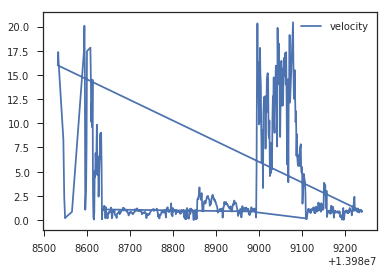

In [116]:
userDriving[['velocity']].plot.line()

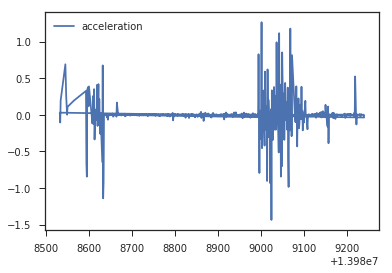

In [117]:
userDriving[['acceleration']].plot.line()

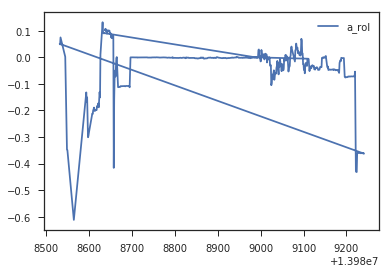

In [118]:
userDriving[['a_rol']].plot.line()

In [119]:
userDriving['a_rol']

13988637    0.101507
13988638    0.105971
13988639    0.107348
13988640    0.098502
13988641    0.102263
13988642    0.089434
13988643    0.101039
13988644    0.100887
13988645    0.101279
13988646    0.100811
13988647    0.098067
13988648    0.100409
13988649    0.086834
13988650    0.092059
13988651    0.088197
13988652    0.074287
13988653    0.078806
13988654    0.071829
13988655    0.072411
13988656    0.080261
13988657    0.079417
13988658   -0.415991
13988659   -0.160356
13988660   -0.071436
13988661   -0.050050
13988662   -0.072676
13988663   -0.034432
13988664   -0.004469
13988665    0.000946
13988668   -0.112357
              ...   
13989081    0.026714
13989082    0.027657
13989083    0.051670
13989084    0.039534
13989085    0.036552
13989086    0.036082
13989087    0.015443
13989088    0.022337
13989089    0.015768
13989090    0.013613
13989091    0.007388
13989092    0.018823
13989093    0.006439
13989094    0.024026
13989095    0.069644
13989096    0.062224
13989097    0

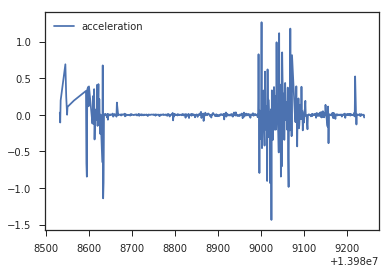

In [121]:
userDriving[['acceleration']].sort_index().plot.line()

Text(0,0.5,'Acceleration rolling')

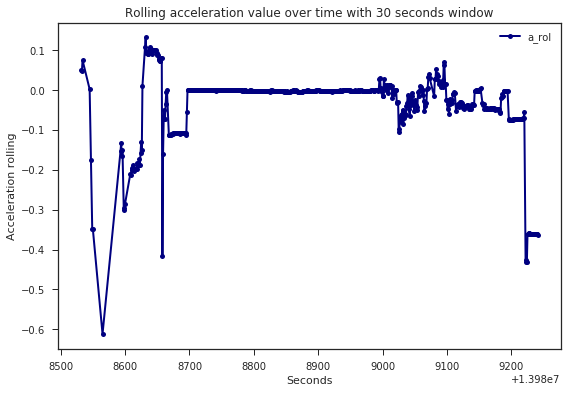

In [142]:
ax = userDriving[['a_rol']].sort_index().plot.line(figsize=(9,6), lw=2, colormap='jet', 
                                                   marker='.', markersize=10, 
                                                   title='Rolling acceleration value over time with 30 seconds window')
ax.set_xlabel("Seconds")
ax.set_ylabel("Acceleration rolling")

Text(0,0.5,'Acceleration rolling')

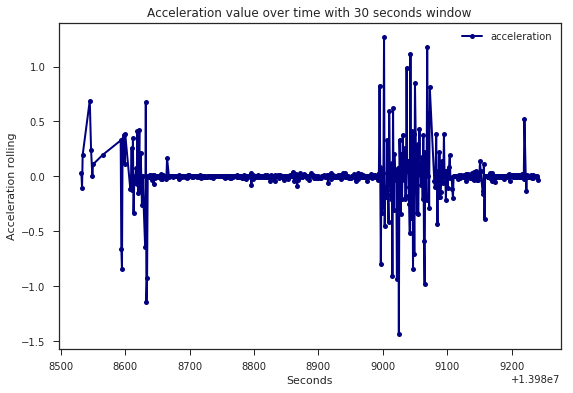

In [141]:
ax = userDriving[['acceleration']].sort_index().plot.line(figsize=(9,6), lw=2, colormap='jet', 
                                                   marker='.', markersize=10, 
                                                   title='Acceleration value over time with 30 seconds window')
ax.set_xlabel("Seconds")
ax.set_ylabel("Acceleration rolling")

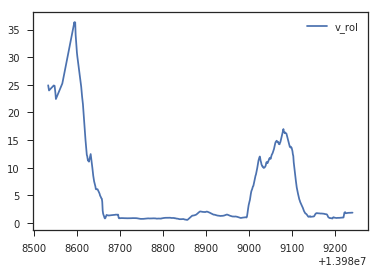

In [125]:
userDriving[['v_rol']].sort_index().plot.line()

Text(0,0.5,'Rolling velocity')

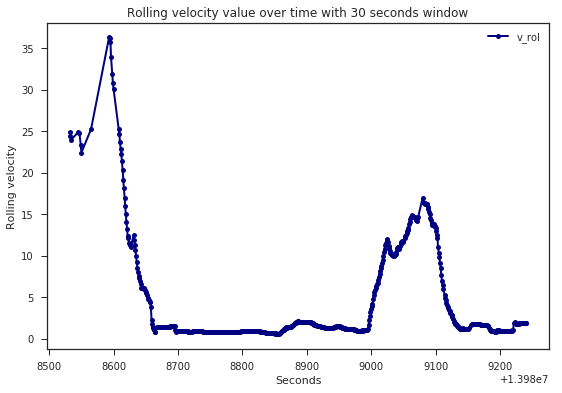

In [144]:
ax = userDriving[['v_rol']].sort_index().plot.line(figsize=(9,6), lw=2, colormap='jet', 
                                                   marker='.', markersize=10, 
                                                   title='Rolling velocity value over time with 30 seconds window')
ax.set_xlabel("Seconds")
ax.set_ylabel("Rolling velocity")

Text(0,0.5,'Velocity')

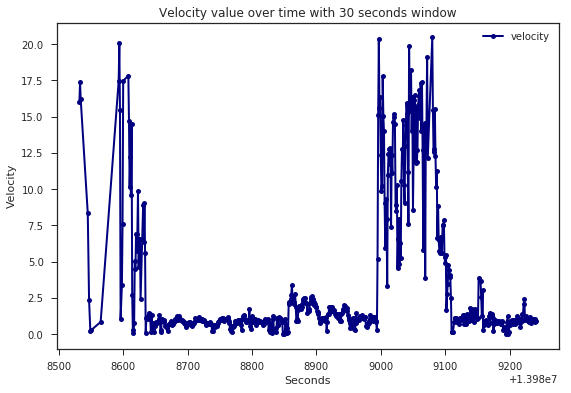

In [146]:
ax = userDriving[['velocity']].sort_index().plot.line(figsize=(9,6), lw=2, colormap='jet', 
                                                   marker='.', markersize=10, 
                                                   title='Velocity value over time with 30 seconds window')
ax.set_xlabel("Seconds")
ax.set_ylabel("Velocity")